In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import os 
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import load_img, img_to_array
import pathlib
import fnmatch

In [11]:
for dirpath, dirnames, filenames in os.walk("dataset"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'dataset'.
There are 0 directories and 212 images in 'dataset\test'.
There are 5 directories and 0 images in 'dataset\train'.
There are 0 directories and 41 images in 'dataset\train\aguacate'.
There are 0 directories and 46 images in 'dataset\train\kiwi'.
There are 0 directories and 42 images in 'dataset\train\limon'.
There are 0 directories and 57 images in 'dataset\train\naranja'.
There are 0 directories and 26 images in 'dataset\train\piña'.


In [12]:
train_path = "dataset/train/"
test_path = "dataset/test/"

In [13]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['aguacate' 'kiwi' 'limon' 'naranja' 'piña']


In [14]:
# View an image
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class  

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), len(fnmatch.filter(os.listdir(target_folder), '*.*')))

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

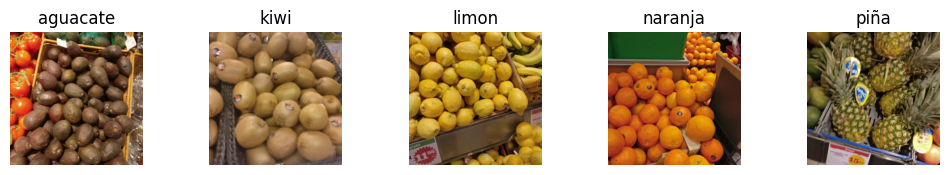

In [16]:
plt.figure(figsize = (15,10))
# View a random image from the training dataset for all classes
for i in range(5):
    plt.subplot(5,6,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

In [17]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

In [18]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df.head()

,path,filename,label
0,dataset/train/aguacate,aguacate_0.jpg,aguacate
1,dataset/train/aguacate,aguacate_1.jpg,aguacate
2,dataset/train/aguacate,aguacate_10.jpg,aguacate
3,dataset/train/aguacate,aguacate_11.jpg,aguacate
4,dataset/train/aguacate,aguacate_12.jpg,aguacate


In [19]:
#Read test data and create a dataframe
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

In [20]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,path,filename
0,dataset/test/,aguacate_0.jpg
1,dataset/test/,aguacate_1.jpg
2,dataset/test/,aguacate_10.jpg
3,dataset/test/,aguacate_11.jpg
4,dataset/test/,aguacate_12.jpg


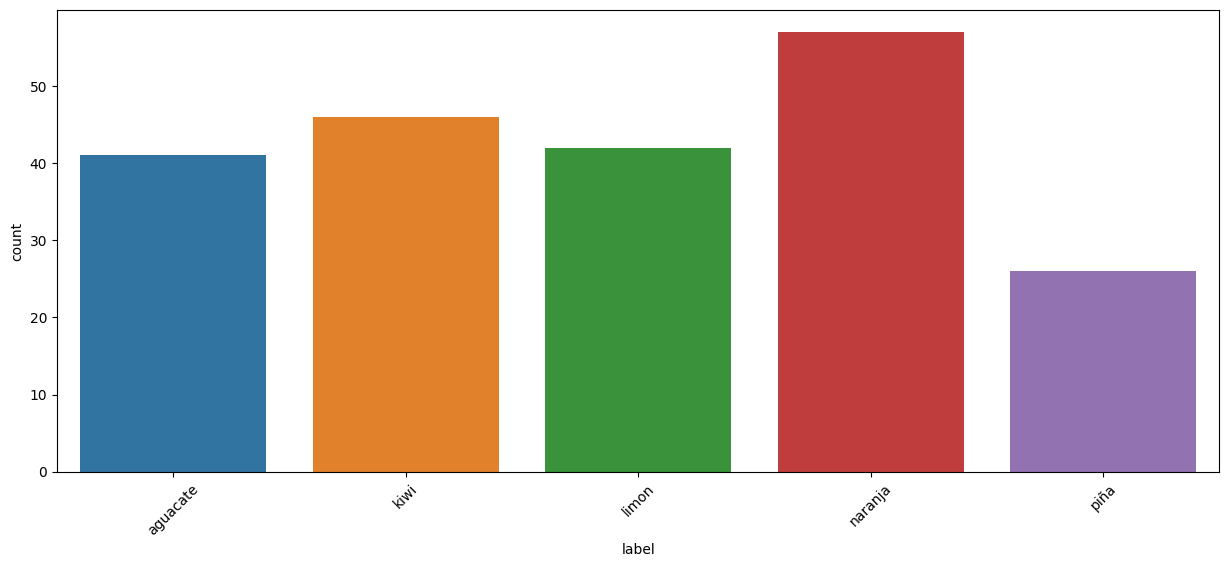

In [21]:
plt.figure(figsize = (15,6))
#data_df['label'].value_counts().plot(kind='barh')
sns_cntplot = sns.countplot(x='label', data=train_val_data_df)
plt.xticks(rotation=45);

In [22]:
images = []
label = [] 

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']),target_size=(348,348))
    images.append(img_to_array(img))
    label.append(d['label'])

In [23]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (212, 348, 348, 3) and label shape: (212,)


In [24]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']),target_size=(348,348))
    test_images.append(img_to_array(img))
    
test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (212, 348, 348, 3) 


In [25]:
class_indices = dict(zip(class_names, range(len(class_names))))

labels_encoded = list(map(class_indices.get, labels))

#Convert to categorical data using tensorflow 
#labels to One-hot encoded
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names), dtype='uint8')

In [26]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20, 
                                                            stratify=label_categorical, 
                                                            random_state=40, shuffle = True)

In [27]:
print ("train data shape after the split: ", train_im.shape)
print ("train data lab shape after the split: ", train_lab.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (169, 348, 348, 3)
train data lab shape after the split:  (169, 5)
new validation data shape:  (43, 348, 348, 3)
validation labels shape:  (43, 5)


In [28]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op.TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op.TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op.TensorSliceDataset'>


In [29]:
### check using element_spec

print (training_data.element_spec)
print (validation_data.element_spec)

### as expected, tensors of image and original label shape


### create an iterator and turn it into numpy array 
train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(348, 348, 3), dtype=tf.float32, name=None), TensorSpec(shape=(5,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(348, 348, 3), dtype=tf.float32, name=None), TensorSpec(shape=(5,), dtype=tf.uint8, name=None))
[[[219. 125.  12.]
  [219. 125.  12.]
  [219. 125.  12.]
  ...
  [162.  68.  34.]
  [159.  64.  34.]
  [156.  62.  34.]]

 [[219. 125.  12.]
  [219. 125.  12.]
  [219. 125.  12.]
  ...
  [155.  62.  29.]
  [145.  54.  25.]
  [139.  48.  21.]]

 [[219. 125.  12.]
  [219. 125.  12.]
  [219. 125.  12.]
  ...
  [145.  55.  28.]
  [131.  43.  19.]
  [121.  35.  12.]]

 ...

 [[ 79.  29.  18.]
  [ 80.  30.  19.]
  [ 81.  31.  20.]
  ...
  [ 64.  44.  33.]
  [ 61.  39.  28.]
  [ 64.  42.  31.]]

 [[ 73.  25.  13.]
  [ 74.  26.  14.]
  [ 75.  27.  15.]
  ...
  [ 66.  44.  33.]
  [ 64.  42.  31.]
  [ 68.  46.  35.]]

 [[ 69.  21.   9.]
  [ 70.  22.  10.]
  [ 72.  24.  12.]
  ...
  [ 64.  42.  31.]
  [ 65.  43.  32.]
  [ 70.  48.  37.]]] 
 [0 0 0 0 1] 3


In [30]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(348, 348, 3) (5,)


In [31]:
train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

(348, 348, 3) (5,)


In [32]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

169 (array([[[112.,  94.,  58.],
        [112.,  94.,  58.],
        [112.,  94.,  58.],
        ...,
        [223., 189., 126.],
        [215., 182., 115.],
        [214., 181., 112.]],

       [[109.,  91.,  55.],
        [109.,  91.,  55.],
        [109.,  91.,  55.],
        ...,
        [227., 193., 130.],
        [222., 187., 121.],
        [221., 188., 119.]],

       [[105.,  87.,  51.],
        [105.,  87.,  51.],
        [106.,  86.,  51.],
        ...,
        [219., 183., 123.],
        [218., 180., 117.],
        [217., 182., 116.]],

       ...,

       [[ 86.,  78.,  42.],
        [ 78.,  72.,  38.],
        [ 63.,  58.,  28.],
        ...,
        [139.,  15.,  25.],
        [143.,  18.,  26.],
        [145.,  20.,  26.]],

       [[ 83.,  75.,  38.],
        [ 79.,  73.,  37.],
        [ 66.,  61.,  31.],
        ...,
        [139.,  15.,  25.],
        [143.,  18.,  26.],
        [145.,  20.,  26.]],

       [[ 80.,  72.,  35.],
        [ 79.,  73.,  37.],
        [ 6

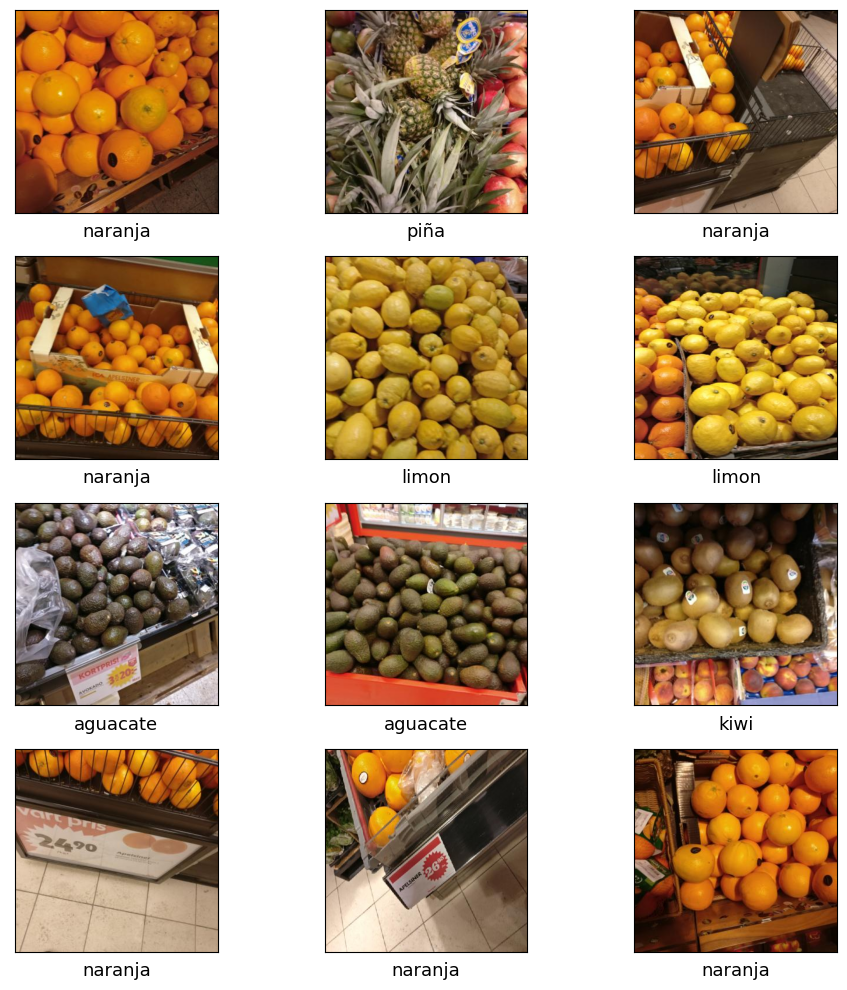

In [33]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()    
plt.show()

In [34]:
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
    #layers.experimental.preprocessing.RandomRotation(0.1)
])

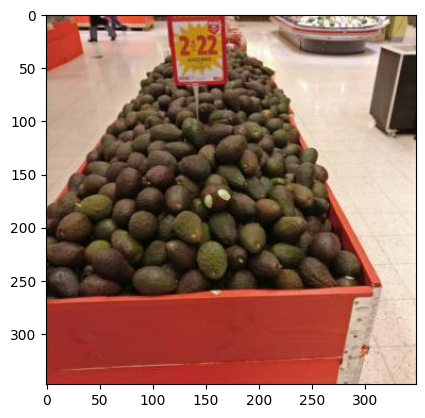

In [35]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)

In [36]:
BATCH_SIZE = 128 
AUTOTUNE = tf.data.AUTOTUNE 

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(1000)
    
    #batch the data 
    ds = ds.batch(BATCH_SIZE)
    
    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
    
    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

In [37]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [38]:
#model_1 = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(filters=5, 
#                          kernel_size = 3,
#                          activation = "relu",
#                          input_shape = (348,348,3)),
#    tf.keras.layers.MaxPool2D(pool_size =2,
#                             padding='valid'),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(len(class_names), activation="softmax")
#])

#model_1.compile(loss="categorical_crossentropy",
#               optimizer = tf.keras.optimizers.Adam(),
#               metrics = ['accuracy'])

#Modelo!
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(348, 348, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

#Compilación
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 346, 346, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 173, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 171, 171, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 85, 85, 64)        0         
                                                                 
 flatten (Flatten)           (None, 462400)           

In [40]:
#Fit the model on training data 
history_1 = model_1.fit(train_ds,
                       epochs =10,
                       validation_data= val_ds)

Epoch 1/10
2/2 [==============================] - 27s 7s/step - loss: 2.4324 - accuracy: 0.2781 - val_loss: 19.5717 - val_accuracy: 0.2093
Epoch 2/10
2/2 [==============================] - 21s 5s/step - loss: 18.3884 - accuracy: 0.2663 - val_loss: 7.2204 - val_accuracy: 0.2558
Epoch 3/10
2/2 [==============================] - 19s 6s/step - loss: 6.2368 - accuracy: 0.2781 - val_loss: 2.3457 - val_accuracy: 0.5116
Epoch 4/10
2/2 [==============================] - 19s 5s/step - loss: 1.6463 - accuracy: 0.5976 - val_loss: 1.7378 - val_accuracy: 0.5116
Epoch 5/10
2/2 [==============================] - 18s 5s/step - loss: 1.4084 - accuracy: 0.5621 - val_loss: 1.1117 - val_accuracy: 0.4651
Epoch 6/10
2/2 [==============================] - 18s 5s/step - loss: 0.8743 - accuracy: 0.5976 - val_loss: 0.9117 - val_accuracy: 0.5581
Epoch 7/10
2/2 [==============================] - 18s 5s/step - loss: 0.5598 - accuracy: 0.8698 - val_loss: 0.9487 - val_accuracy: 0.6279
Epoch 8/10
2/2 [================

In [41]:
model_1.evaluate(val_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.7720 - accuracy: 0.7442


[0.7720136642456055, 0.7441860437393188]

<AxesSubplot:>

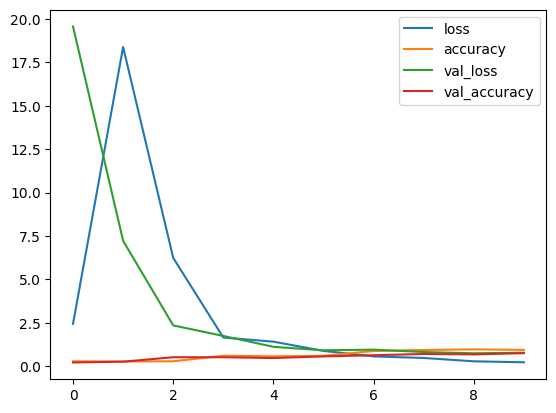

In [42]:
#loss and accuracy plot 
pd.DataFrame(history_1.history).plot()

In [43]:
y_pred = model_1.predict(val_ds)

1/1 [==============================] - 1s 1s/step


In [44]:
y_pred[:1]

array([[3.2821926e-04, 5.0530210e-04, 7.4011147e-02, 9.2509663e-01,
        5.8712998e-05]], dtype=float32)

In [45]:
y_pred.shape  #shape of y_pred

(43, 5)

In [46]:
y_pred = tf.argmax(y_pred, axis=1) # Get y_pred classes 

In [47]:
y_true = np.argmax(valid_lab,axis=1)

In [48]:
y_true, y_pred

(array([3, 3, 3, 4, 1, 2, 1, 0, 3, 1, 4, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1, 4,
        3, 4, 3, 0, 2, 3, 0, 0, 3, 1, 0, 4, 0, 2, 3, 1, 1, 0, 2, 0, 3],
       dtype=int64),
 <tf.Tensor: shape=(43,), dtype=int64, numpy=
 array([3, 3, 3, 4, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 3, 1, 4,
        3, 4, 3, 0, 2, 2, 1, 1, 3, 1, 0, 1, 1, 2, 3, 1, 1, 0, 2, 1, 3],
       dtype=int64)>)

In [49]:
len(y_pred), len(y_true)

(43, 43)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[3, 5, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 1, 8, 0, 0],
       [0, 1, 2, 9, 0],
       [0, 2, 0, 0, 3]], dtype=int64)

<AxesSubplot:>

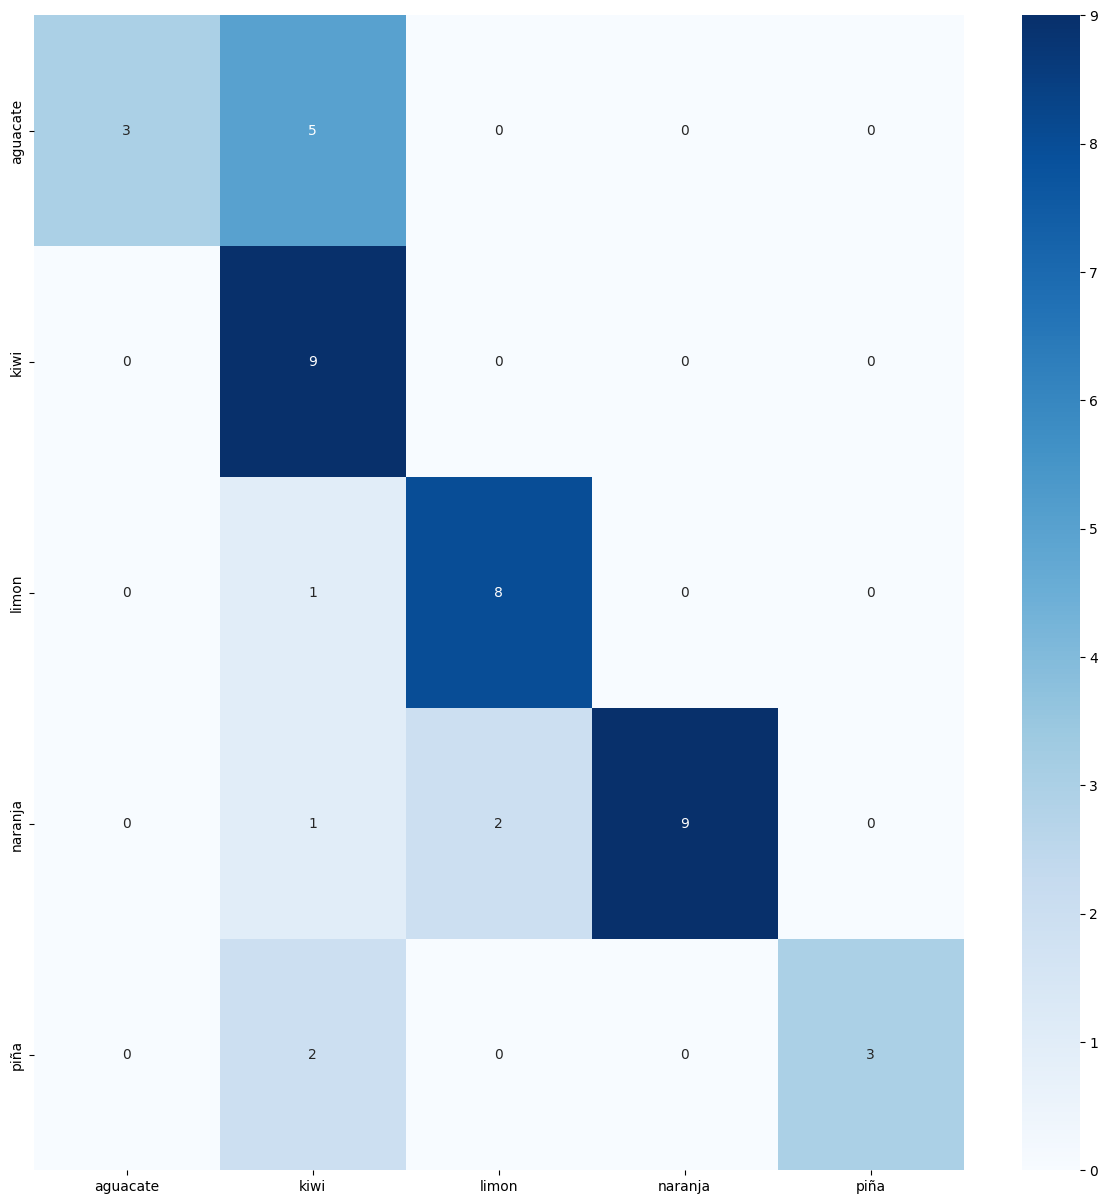

In [51]:
plt.figure(figsize = (15,15))
sns.heatmap(pd.DataFrame(cm, index= class_names, columns = class_names), annot = True, cmap="Blues")

In [52]:
predictions = model_1.predict(test_ds)

2/2 [==============================] - 5s 2s/step


In [53]:
predictions.shape

(212, 5)

In [54]:
predictions = class_names[tf.argmax(predictions, axis=1)] # Get classes 
predictions[:5]

array(['kiwi', 'aguacate', 'kiwi', 'kiwi', 'kiwi'], dtype='<U8')

In [55]:
predictions.shape

(212,)

In [56]:
submission = pd.read_csv("dataset/sampleSubmission.csv")
submission.head(2)

,id;label
0,0;manzana
1,1;manzana


In [57]:
test_data_df.head() # We already have this data. lets take filename from this

,path,filename
0,dataset/test/,aguacate_0.jpg
1,dataset/test/,aguacate_1.jpg
2,dataset/test/,aguacate_10.jpg
3,dataset/test/,aguacate_11.jpg
4,dataset/test/,aguacate_12.jpg


In [58]:
submission['id'] = test_data_df['filename']
submission['label'] = predictions

In [59]:
submission.head()

,id;label,id,label
0,0;manzana,aguacate_0.jpg,kiwi
1,1;manzana,aguacate_1.jpg,aguacate
2,2;manzana,aguacate_10.jpg,kiwi
3,3;manzana,aguacate_11.jpg,kiwi
4,4;manzana,aguacate_12.jpg,kiwi


In [61]:
submission.to_csv("result.csv",index=False)